In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from bandbLIMID import BranchAndBoundLIMIDInference
from exemple_robot import createIDRobot
import numpy as np

maze=["---------",
      "--     --",
      "-  - -  -",
      "-- - - --",
      "-  - - $-",
      "--     --",
      "---------"]
nbStage=2
xInitial=3
yInitial=2
ID=createIDRobot(nbStage,xInitial,yInitial,maze)
#gnb.showInfluenceDiagram(ID)
ordre=[]
for i in range(nbStage):
    ordre.append(ID.idFromName("d_"+str(i)))

def checkCPTs(bn):
    nodes=[]
    for i in bn.nodes():
        if bn.isChanceNode(i):
            p=bn.cpt(i).margSumOut(bn.variable(i).name())
            if (abs(p.min()-1)>1e-10) or (abs(p.max()-1)>1e-10):
                print(f"erreur  CPT for {bn.variable(i).name()} :")
                #print(bn.cpt(i))
                #nodes.append(bn.variable(i).name())
                nodes.append(i)
    if len(nodes)==0:
            print("pas d'erreur")
    return nodes
nodes=checkCPTs(ID)
bnb=BranchAndBoundLIMIDInference(ID,ordre)



In [2]:
bnb.setVerbose(False)
import time
begin=time.time()
bnb.branchAndBound()
end=time.time()
print(end-begin)

NameError: name 'bnb' is not defined

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from bandbLIMID import BranchAndBoundLIMIDInference
from exemple_robot import createLIMIDRobot
import numpy as np

maze=["---------",
      "--     --",
      "-  - -  -",
      "-- - - --",
      "-  - - $-",
      "--     --",
      "---------"]
nbStage=2
xInitial=3
yInitial=2
ID=createLIMIDRobot(nbStage,xInitial,yInitial,maze)
#gnb.showInfluenceDiagram(ID)
ordre=[]
for i in range(nbStage):
    ordre.append(ID.idFromName("d_"+str(i)))

def checkCPTs(bn):
    nodes=[]
    for i in bn.nodes():
        if bn.isChanceNode(i):
            p=bn.cpt(i).margSumOut(bn.variable(i).name())
            if (abs(p.min()-1)>1e-10) or (abs(p.max()-1)>1e-10):
                print(f"erreur  CPT for {bn.variable(i).name()} :")
                #print(bn.cpt(i))
                #nodes.append(bn.variable(i).name())
                nodes.append(i)
    if len(nodes)==0:
            print("pas d'erreur")
    return nodes
nodes=checkCPTs(ID)
bnb=BranchAndBoundLIMIDInference(ID,ordre,verbose=True)
bnb.branchAndBound()


In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from bandbLIMID import BranchAndBoundLIMIDInference
from exemple_robot import createRandomID
import numpy as np
from andOrGraph import chanceNode,decisionNode

In [ ]:
ID=gum.fastID("X0->*D0->X1->$U0")
#gnb.sideBySide(*[ID.cpt(id) for id in ID.nodes() if ID.isChanceNode(id)])
gnb.showInfluenceDiagram(ID)
ordre=[ID.idFromName("D0")]
bnb=BranchAndBoundLIMIDInference(ID,ordre,True)
bnb.branchAndBound()
gnb.show(bnb.viewAndOrGraph())
andOrGraph=bnb.andOrGraph
for nodeDecision in andOrGraph.getNoeudDecision():
    print(nodeDecision.getEvaluation())
    print(nodeDecision.getBorneSup())


In [14]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from bandbLIMID import BranchAndBoundLIMIDInference
from exemple_robot import createIDRobot
import numpy as np
import time

IDTest=gum.fastID("X0->*D0->X1->*D1->X2->$U0")
"""gnb.sideBySide(*[IDTest.cpt(id) for id in IDTest.nodes() if IDTest.isChanceNode(id)])
gnb.showInfluenceDiagram(IDTest)"""
ordre=[IDTest.idFromName("D0"),IDTest.idFromName("D1")]
bnb=BranchAndBoundLIMIDInference(IDTest,ordre,False)
begin=time.time()
bnb.branchAndBound()
end=time.time()
print(end-begin)
import sys
print(sys.getsizeof(bnb.andOrGraph.getNoeudDecision()[0]),"octets")
print(sys.getsizeof(bnb.andOrGraph.getNoeudChance()[0]),"octets")

s=gum.ShaferShenoyLIMIDInference(IDTest)
begin=time.time()
s.makeInference()
end=time.time()
print(end-begin)
def human_readable(n):
    def div1024(x): return x//1024, x % 1024
    res = ""

    for s in ["o", "Ko", "Mo", "Go"]:
        n, r = div1024(n)
        if r > 0:
            res = f"{r}{s} {res}"
        if n == 0:
            return res

    return f"{n}To {res}"
def nbParamInClique(model, jt, n):
    nb = 8  # size of python's float
    for i in jt.clique(n):
        nb *= model.variable(i).domainSize()
    return nb
jt = s.junctionTree()
maxtw = max([len(jt.clique(n)) for n in jt.nodes()])
maxsize = max([nbParamInClique(IDTest, jt, n) for n in jt.nodes()])
print(f"treewidth={maxtw} - size= {human_readable(maxsize)}")

"""gnb.show(bnb.viewAndOrGraph())
gnb.show(bnb.viewAndOrGraphNoCuts())
andOrGraph=bnb.andOrGraph
for nodeDecision in andOrGraph.getNoeudDecision():
    print("eval",IDTest.variable(nodeDecision.getID()),nodeDecision.getEvaluation())
    print("BS",IDTest.variable(nodeDecision.getID()),nodeDecision.getBorneSup())"""


0.010428905487060547
48 octet
48 octet
0.0006940364837646484
treewidth=2 - size= 32o 


'gnb.show(bnb.viewAndOrGraph())\ngnb.show(bnb.viewAndOrGraphNoCuts())\nandOrGraph=bnb.andOrGraph\nfor nodeDecision in andOrGraph.getNoeudDecision():\n    print("eval",IDTest.variable(nodeDecision.getID()),nodeDecision.getEvaluation())\n    print("BS",IDTest.variable(nodeDecision.getID()),nodeDecision.getBorneSup())'

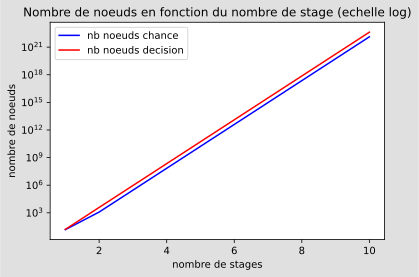

In [17]:
#Evaluation en espace
import matplotlib.pyplot as plt
import numpy as np

nbNoeudChanceCouche=15
nbNoeudDecicionCouche=16
nbNoeud=[]
stages=range(1,11)
for nbStage in stages:
    if(nbStage==1):
        nbNoeud.append((15,16))
        nbNoeudAjouteChanceAvant=15
        nbNoeudAjouteDecisionAvant=16
    else:
        nbChance=nbNoeud[-1][0]+nbNoeudAjouteDecisionAvant*5*15
        nbDecision=nbNoeud[-1][1]+nbNoeudAjouteDecisionAvant*15*16
        nbNoeudAjouteChanceAvant=nbNoeudAjouteDecisionAvant*5*15
        nbNoeudAjouteDecisionAvant=nbNoeudAjouteDecisionAvant*15*16
        nbNoeud.append((nbChance,nbDecision))
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(stages, [nb[0] for nb in nbNoeud],label="nb noeuds chance",c='b')  # Plot some data on the axes.
ax.plot(stages, [nb[1] for nb in nbNoeud],label="nb noeuds decision",c='r')
ax.legend()
ax.set_xlabel("nombre de stages")
ax.set_ylabel("nombre de noeuds")
plt.yscale("log")
plt.title("Nombre de noeuds en fonction du nombre de stage (echelle log)")
plt.show()

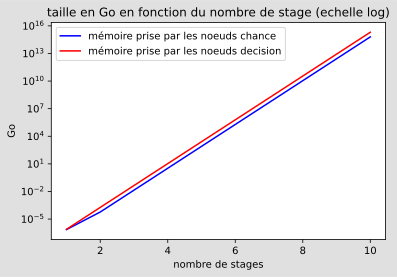

In [18]:
nbOctetNoeudChance=48
nbOctetNoeudDecision=48
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(stages, [(nb[0]*nbOctetNoeudChance)/1_000_000_000 for nb in nbNoeud],label="mémoire prise par les noeuds chance",c='b')  # Plot some data on the axes.
ax.plot(stages, [(nb[1]*nbOctetNoeudDecision)/1_000_000_000 for nb in nbNoeud],label="mémoire prise par les noeuds decision",c='r')
ax.legend()
ax.set_xlabel("nombre de stages")
ax.set_ylabel("Go")
plt.yscale("log")
plt.title("taille en Go en fonction du nombre de stage (echelle log)")
plt.show()

In [20]:
nbOctetNoeudChance=48
nbOctetNoeudDecision=48
print(nbOctetNoeudChance*3+nbOctetNoeudDecision*6)

432


In [ ]:
####

import pyAgrum as gum
from minindepset import MinimalDSep
import random
def test_seperating_set():
    notSep=[]
    gen=gum.BNGenerator()
    nbTestParN=100
    for n in [10]:
        nbArcs=[int(n*(random.randint(120,170)/100)) for i in range(nbTestParN)]
        for l in range(nbTestParN):
            bn=gen.generate(n_nodes=n,n_arcs=nbArcs[l],n_modmax=4)
            #src,dst=npRandom.choice(list(bn.nodes()),replace=False,size=2)
            l=random.sample(bn.nodes(),2)
            src=l[0]
            dst=l[1]
            graph=bn.moralizedAncestralGraph({src,dst})
            m=MinimalDSep(graph,bn)
            separatingSet=m.find(src,dst)
            if(not bn.isIndependent(src,dst,list(separatingSet))):
                notSep.append((bn,src,dst,separatingSet))
    return notSep
notSep=test_seperating_set()

In [ ]:
import pyAgrum.lib.notebook as gnb
for bn,src,dst,sepSet in notSep:                    
    gnb.showBN(bn)
    print(f"source : {bn.variable(src).name()} destination : {bn.variable(dst).name()} ensemble séparant :{[bn.variable(node).name() for node in sepSet]}")

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from bandbLIMID import BranchAndBoundLIMIDInference
from exemple_robot import createRandomID
import random
def test_branchAndBound_IDAleatoires():
    nbChance=random.randint(2,8)
    nbDecision=int(random.randint(1,int(nbChance/2)))
    nb=int(nbDecision*random.random())
    nbUtility=nb if nb>0 else 1
    nbArc=int(nbChance*(random.random()+1))
    print("generation")
    ID=createRandomID(nbDecision,nbChance,nbUtility,nbArc,0)
    print("created")
    gnb.showInfluenceDiagram(ID)
    ordre=[id for id in ID.nodes() if ID.isDecisionNode(id)]
    random.shuffle(ordre)
    print([f'id {id} name {ID.variable(id).name()}' for id in ID.nodes()])
    bnb=BranchAndBoundLIMIDInference(ID,ordre,verbose=True)
    print("bnb")
    bnb.branchAndBound()
    print("coupe",bnb.nbCoupe)
    return bnb
bnb=test_branchAndBound_IDAleatoires()

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
#IDExemple=gum.fastID("$Utilité<-Conditions Réelles->Prévisions méteo->*Intérieur Ou Plein Air->$Utilité")
#gnb.showInfluenceDiagram(IDExemple)
arbreDeDecisionExemple=gum.fastID("*Intérieur_Ou_Plein Air<-Prévisions_méteo<-Conditions Réelles->Prévisions méteo->*Intérieur_Ou Plein Air;*Intérieur Ou Plein Air<-Prévisions_méteo;Prévisions méteo->*Intérieur_Ou Plein_Air")
gnb.showInfluenceDiagram(arbreDeDecisionExemple)

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
IDExemple=gum.fastID("c1;c2;c3;c4;*d1;*d2;*d3;*d4;$u1;$u2;$u3;$u4;u3<-d1->d2;c1<-d2->d3;u1<-d3->d4;c3<-d4->u4;u3<-c1->c4;c1->c2;u1<-c2->c3;u2<-c3;d4<-c4->u4")
gnb.showInfluenceDiagram(IDExemple)
LIMIDExemple=gum.fastID("c1;c2;c3;c4;*d1;*d2;*d3;*d4;$u1;$u2;$u3;$u4;u3<-d1->d2;d3<-d1->d4<-d2;c1<-d2->d3;u1<-d3->d4;c3<-d4->u4;u3<-c1->c4;c1->c2;u1<-c2->c3;u2<-c3;d4<-c4->u4")
gnb.showInfluenceDiagram(LIMIDExemple)


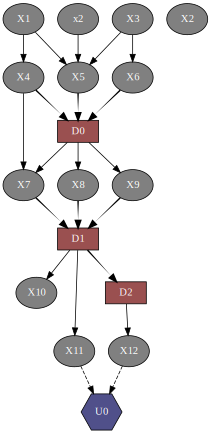

ajout d'une couche, de racine, X4 avec les noeuds de décisions crées étants : ['D0', 'D0', 'D0', 'D0', 'D0', 'D0', 'D0', 'D0'] de taille 8 et d'id [10, 11, 12, 13, 14, 15, 16, 17]
Calcul des bornes pour les noeuds de décisions
####################################################################################################################
####################################################################################################################
####################################################################################################################
####################################################################################################################
Nouvelle Branche, nombre de branche au total: 1 nombre de branches coupées: 0
On va développer le noeud D0 id 10 On va donc chercher les parents du noeud D1
Le domaine de D0 : ['0', '1'] ,les valeurs déjà processed: [] ce qu'on va process : 0
D0 de contexte :
X4 : 0
X5 : 0
X6 : 0
D0 : 0
Les parents de  D

In [29]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from bandbLIMID import BranchAndBoundLIMIDInference
from exemple_robot import createIDRobot
import numpy as np
import time

#IDTest=gum.fastID("X1->X3->*D0->X5->*D1->X7->$U1;X2->X4->D0->X6->D1;X2<-X1->X5;D0->D1->U1")
s=""
for i in range(1,13):
    s+=f"X{i};"
s+=f"*D{0};"
s+=f"*D{1};"
s+=f"*D{2};"
s+=f"$U{0};"
IDTest=gum.fastID(s+"X5<-X1->X4;X2->X5<-X3->X6->D0->X9->D1;X7<-D0->X8;X7<-X4->D0;X5->D0;X7->D1;X8->D1->X10;D2<-D1->X11;D2->X12->U0<-X11")

"""gnb.sideBySide(*[IDTest.cpt(id) for id in IDTest.nodes() if IDTest.isChanceNode(id)])"""
gnb.showInfluenceDiagram(IDTest)
ordre=[IDTest.idFromName("D0"),IDTest.idFromName("D1")]
bnb=BranchAndBoundLIMIDInference(IDTest,ordre,True)
begin=time.time()
bnb.branchAndBound()
end=time.time()
print(end-begin)

s=gum.ShaferShenoyLIMIDInference(IDTest)
begin=time.time()
s.makeInference()
end=time.time()
print(end-begin)
def human_readable(n):
    def div1024(x): return x//1024, x % 1024
    res = ""

    for s in ["o", "Ko", "Mo", "Go"]:
        n, r = div1024(n)
        if r > 0:
            res = f"{r}{s} {res}"
        if n == 0:
            return res

    return f"{n}To {res}"
def nbParamInClique(model, jt, n):
    nb = 8  # size of python's float
    for i in jt.clique(n):
        nb *= model.variable(i).domainSize()
    return nb
jt = s.junctionTree()
maxtw = max([len(jt.clique(n)) for n in jt.nodes()])
maxsize = max([nbParamInClique(IDTest, jt, n) for n in jt.nodes()])
print(f"treewidth={maxtw} - size= {human_readable(maxsize)}")
andOr=bnb.viewAndOrGraph()
andOrComplet=bnb.viewAndOrGraphNoCuts()
gnb.show(andOr)
gnb.show(andOrComplet)

In [27]:
print(len(andOr.nodes()))
print(len(andOrComplet.nodes()))

35
63
